In [5]:
# Import the required libraries and dependencies
import os
import requests
import pandas as pd
from pathlib import Path
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
%matplotlib inline
import hvplot.pandas
import pandas_datareader.data as reader
import datetime as dt
import statsmodels.api as sm
import getFamaFrenchFactors as gff
import seaborn as sns

In [13]:
#end = dt.datetime.now() #define the time frame
end = dt.date(2019, 3, 31)
start = dt.date(2014, 9, 17)  #earliest can grab data for BTC from Yahoo Finance
ticker = ["BTC-USD"]

In [14]:
btc_dreturns = reader.get_data_yahoo(ticker, start, end)["Adj Close"]
display(btc_dreturns.head())
btc_dreturns.tail()

Symbols,BTC-USD
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014


Symbols,BTC-USD
Date,
2019-03-28,4069.107178
2019-03-29,4098.374512
2019-03-30,4106.660156
2019-03-31,4105.404297
2019-04-01,4158.183105


In [15]:
btc_dreturns = btc_dreturns.pct_change().dropna() #convert to monthly returns and drop NaN values
display(btc_dreturns.head())
btc_dreturns.tail()

Symbols,BTC-USD
Date,
2014-09-18,-0.071926
2014-09-19,-0.069843
2014-09-20,0.035735
2014-09-21,-0.024659
2014-09-22,0.008352


Symbols,BTC-USD
Date,
2019-03-28,-0.004394
2019-03-29,0.007193
2019-03-30,0.002022
2019-03-31,-0.000306
2019-04-01,0.012856


In [16]:
ff3_daily = reader.DataReader("F-F_Research_Data_Factors_daily", "famafrench", start, end)[0]
#ff3_daily = ff3_daily.iloc[1:]
display(ff3_daily.head())
ff3_daily.tail()

,Mkt-RF,SMB,HML,RF
Date,,,,
2014-09-17,0.17,0.09,-0.21,0.0
2014-09-18,0.50,0.03,0.01,0.0
2014-09-19,-0.18,-0.96,0.02,0.0
2014-09-22,-0.97,-0.56,0.09,0.0
2014-09-23,-0.62,-0.30,-0.05,0.0


,Mkt-RF,SMB,HML,RF
Date,,,,
2019-03-25,-0.05,0.66,-0.27,0.009
2019-03-26,0.76,0.17,0.46,0.009
2019-03-27,-0.50,0.10,0.50,0.009
2019-03-28,0.40,0.34,0.02,0.009
2019-03-29,0.66,-0.22,-0.91,0.009


In [17]:
ff3_daily[["Mkt-RF", "SMB", "HML", "RF"]] = ff3_daily[["Mkt-RF", "SMB", "HML", "RF"]]/100 #get factor data 
ff3_daily.shape

(1141, 4)

In [18]:
momentum_factor = pd.read_csv(
    Path("./Resources/F-F_Momentum_Factor_daily.csv"),
    header=None
)

momentum_factor

,0,1
0,19261103,0.56
1,19261104,-0.50
2,19261105,1.17
3,19261106,-0.03
4,19261108,-0.01
...,...,...
25106,20220329,-1.98
25107,20220330,1.03
25108,20220331,0.40
25109,NaN,NaN


In [19]:
momentum_factor.columns = ["Date", "Mom"]
momentum_factor.columns

Index(['Date', 'Mom'], dtype='object')

In [20]:
momentum_factor = momentum_factor.loc[
    (momentum_factor["Date"] >= "20140917")
    & (momentum_factor["Date"] <= "20190331")
]

In [21]:
display(momentum_factor.head())
display(momentum_factor.tail())
momentum_factor.shape

,Date,Mom
23210,20140917,0.07
23211,20140918,0.07
23212,20140919,0.01
23213,20140922,-0.05
23214,20140923,0.26


,Date,Mom
24346,20190325,0.65
24347,20190326,-0.46
24348,20190327,-0.37
24349,20190328,-0.18
24350,20190329,0.00


(1141, 2)

In [22]:
momentum_factor.set_index("Date")

,Mom
Date,
20140917,0.07
20140918,0.07
20140919,0.01
20140922,-0.05
20140923,0.26
...,...
20190325,0.65
20190326,-0.46
20190327,-0.37


In [23]:
momentum_factor["Mom"] = momentum_factor["Mom"]/100  
momentum_factor.head()

/Users/nicoleroberts/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Date,Mom
23210,20140917,0.0007
23211,20140918,0.0007
23212,20140919,0.0001
23213,20140922,-0.0005
23214,20140923,0.0026


In [24]:
momentum_factor.index = ff3_daily.index

In [25]:
momentum_factor.drop(columns="Date", inplace=True)
momentum_factor

/Users/nicoleroberts/opt/anaconda3/envs/dev/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Mom
Date,
2014-09-17,0.0007
2014-09-18,0.0007
2014-09-19,0.0001
2014-09-22,-0.0005
2014-09-23,0.0026
...,...
2019-03-25,0.0065
2019-03-26,-0.0046
2019-03-27,-0.0037


In [26]:
data = ff3_daily.merge(btc_dreturns, on="Date")  #merging
display(data.head())
data.tail()

,Mkt-RF,SMB,HML,RF,BTC-USD
Date,,,,,
2014-09-18,0.0050,0.0003,0.0001,0.0,-0.071926
2014-09-19,-0.0018,-0.0096,0.0002,0.0,-0.069843
2014-09-22,-0.0097,-0.0056,0.0009,0.0,0.008352
2014-09-23,-0.0062,-0.0030,-0.0005,0.0,0.083647
2014-09-24,0.0081,0.0010,-0.0092,0.0,-0.028881


,Mkt-RF,SMB,HML,RF,BTC-USD
Date,,,,,
2019-03-25,-0.0005,0.0066,-0.0027,0.00009,-0.014693
2019-03-26,0.0076,0.0017,0.0046,0.00009,0.005554
2019-03-27,-0.0050,0.0010,0.0050,0.00009,0.025592
2019-03-28,0.0040,0.0034,0.0002,0.00009,-0.004394
2019-03-29,0.0066,-0.0022,-0.0091,0.00009,0.007193


In [27]:
regress_data = data.merge(momentum_factor, on="Date")  #merging
regress_data = regress_data[["Mkt-RF", "SMB", "HML", "Mom", "RF", "BTC-USD"]]
display(regress_data.head())
regress_data.tail()

,Mkt-RF,SMB,HML,Mom,RF,BTC-USD
Date,,,,,,
2014-09-18,0.0050,0.0003,0.0001,0.0007,0.0,-0.071926
2014-09-19,-0.0018,-0.0096,0.0002,0.0001,0.0,-0.069843
2014-09-22,-0.0097,-0.0056,0.0009,-0.0005,0.0,0.008352
2014-09-23,-0.0062,-0.0030,-0.0005,0.0026,0.0,0.083647
2014-09-24,0.0081,0.0010,-0.0092,0.0015,0.0,-0.028881


,Mkt-RF,SMB,HML,Mom,RF,BTC-USD
Date,,,,,,
2019-03-25,-0.0005,0.0066,-0.0027,0.0065,0.00009,-0.014693
2019-03-26,0.0076,0.0017,0.0046,-0.0046,0.00009,0.005554
2019-03-27,-0.0050,0.0010,0.0050,-0.0037,0.00009,0.025592
2019-03-28,0.0040,0.0034,0.0002,-0.0018,0.00009,-0.004394
2019-03-29,0.0066,-0.0022,-0.0091,0.0000,0.00009,0.007193


In [28]:
regress_data["BTC-RF"] = regress_data["BTC-USD"] - regress_data["RF"]
regress_data.head()

,Mkt-RF,SMB,HML,Mom,RF,BTC-USD,BTC-RF
Date,,,,,,,
2014-09-18,0.0050,0.0003,0.0001,0.0007,0.0,-0.071926,-0.071926
2014-09-19,-0.0018,-0.0096,0.0002,0.0001,0.0,-0.069843,-0.069843
2014-09-22,-0.0097,-0.0056,0.0009,-0.0005,0.0,0.008352,0.008352
2014-09-23,-0.0062,-0.0030,-0.0005,0.0026,0.0,0.083647,0.083647
2014-09-24,0.0081,0.0010,-0.0092,0.0015,0.0,-0.028881,-0.028881


<AxesSubplot:xlabel='Mkt-RF', ylabel='BTC-RF'>

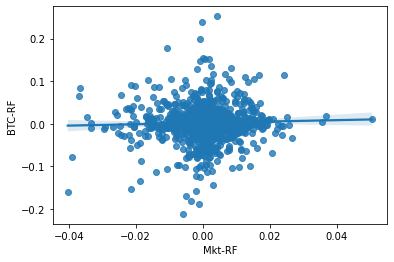

In [29]:
sns.regplot(x="Mkt-RF", y="BTC-RF", data=regress_data) #checking relationships between two variables graphically using seaborn regplot. Scatter plot shows excess returns on the market versus excess returns on BTC.

In [30]:
X = regress_data[["Mkt-RF", "SMB", "HML", "Mom"]]
y = regress_data["BTC-RF"]

X1 = sm.add_constant(X) #defining constant
model = sm.OLS(y, X1)

results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BTC-RF   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.4831
Date:                Thu, 05 May 2022   Prob (F-statistic):              0.748
Time:                        14:18:24   Log-Likelihood:                 2027.8
No. Observations:                1140   AIC:                            -4046.
Df Residuals:                    1135   BIC:                            -4020.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0022      0.001      1.830      0.067      -0.000       0.005
Mkt-RF         0.1586      0.140      1.134      0.257      -0.116       0.433
SMB            0.1546      0.243      0.635      0.526      -0.323       0.632
HML            0.1381      0.253      0.547      0.585      -0.358       0.634
Mom            0.0500      0.182      0.275      0.783      -0.307       0.407
==============================================================================
Omnibus:                      150.265   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1553.423
Skew:                           0.136   Prob(JB):                         0.00
Kurtosis:                       8.712   Cond. No.                         237.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
intercept, beta_m, beta_s, beta_v, beta_mom = results.params
print(beta_m, beta_s, beta_v, beta_mom) #This tells us how much exposure BTC has to the market, size, and value in the last three years

0.15862609775928915 0.15455494389987212 0.1380623105406228 0.05004764802103797


In [32]:
#Note on CAPM: Expected returns is calculated as risk free rate + risk premium, and the risk premium depends on market risk premium. 
#Beta is the quantity of risk in the stock. If beta is 1, it has same amount of risk as the market. BTC's beta is ~1.5, so it has about
#1.5x risk as the market portfolio does. Based on CAPM, to compensate for this excess risk of BTC, BTC should have an expected return  
#of ~1.5x over the market return.

#Market risk is unavoidable, this is a nondiversifiable risk, which for BTC has been increasing steadily since 2019. 

In [33]:
#Risk free rate

risk_free = regress_data["RF"].mean()
risk_free

2.971929824561406e-05

In [34]:
#Expected excess return of the market (the market risk premium). Note, all is based on daily return! So as calculated here, the average 
#daily return of the S&P500 (in excess of risk-free rate) during this period is .075%.

market_premium = regress_data["Mkt-RF"].mean()
market_premium

0.0003948245614035086

In [35]:
#Note on Fama French Factors: There is some systematic risk due to size, value (book equity to market equity), and momementum of stocks that 
#is not captured by market risk as measured by the CAPM. Stock risks are multidimensional! 

In [36]:
size_premium = regress_data["SMB"].mean()
value_premium = regress_data["HML"].mean()
momentum_premium = regress_data["Mom"].mean()

size_premium = regress_data["SMB"].mean()
value_premium = regress_data["HML"].mean()
momentum_premium = regress_data["Mom"].mean()

print(market_premium, size_premium, value_premium, momentum_premium)  #monthly premiums, shows how market, size, value, momentum yield premiums

0.0003948245614035086 -1.017543859649127e-05 -0.00020842105263157895 0.00014421052631578978


In [37]:
#Compute expected return of BTC using CAPM

btc_exp_return = risk_free + (beta_m * market_premium) + (beta_s * size_premium) + (beta_v * value_premium) + (beta_mom * momentum_premium)

#yearly_return

btc_exp_yr_return = btc_exp_return * 252

print(f"Using the Fama French Four Factor model, the expected annual return of Bitcoin is: %{btc_exp_yr_return*100}.")

Using the Fama French Four Factor model, the expected annual return of Bitcoin is: %1.7443041575272715.


In [ ]:
tickers = ["BTC", "ETH", "BNB", "XRP", "SOL", "LUNA", "ADA", "AVAX", "DOT", "DOGE"]